<a href="https://colab.research.google.com/github/sohail08/Natural_Image_Classification_Alexnet/blob/main/natural_scenes_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install --upgrade --ignore-installed kaggle


     |████████████████████████████████| 61kB 3.0MB/s 
     |████████████████████████████████| 153kB 8.5MB/s 
     |████████████████████████████████| 235kB 18.9MB/s 
     |████████████████████████████████| 61kB 5.9MB/s 
     |████████████████████████████████| 71kB 5.6MB/s 
     |████████████████████████████████| 143kB 15.5MB/s 
     |████████████████████████████████| 61kB 6.0MB/s 
     |████████████████████████████████| 184kB 15.3MB/s 
     |████████████████████████████████| 81kB 6.4MB/s 
  Created wheel for kaggle: filename=kaggle-1.5.10-cp36-none-any.whl size=73269 sha256=ac16ae8a913ff49befad13bbf29df9db6bc4e88afe1118ab82c96edc313d8821
  Stored in directory: /root/.cache/pip/wheels/3a/d1/7e/6ce09b72b770149802c653a02783821629146983ee5a360f10
  Created wheel for python-slugify: filename=python_slugify-4.0.1-py2.py3-none-any.whl size=6769 sha256=20ebbc4cfb2348577ff55c46288cd5b1343656288e52b450c87d82fe9c067c8e
  Stored in directory: /root/.cache/pip/wheels/67/b8/ba/041548f30a6fc058c9b3f79

In [7]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"muhammadsohail123","key":"629ebb4ab3f9bc22d9c6dd446436e98a"}'}

In [8]:
!mkdir ~/.kaggle #created at root folder in colab

In [9]:
#copy
!cp kaggle.json ~/.kaggle

In [10]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets list

ref                                                            title                                                size  lastUpdated          downloadCount  
-------------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  
utkarshxy/who-worldhealth-statistics-2020-complete             World Health 2020 🌏 | For Geospatial Analysis         1MB  2021-01-02 10:22:56            281  
gpreda/pfizer-vaccine-tweets                                   Pfizer Vaccine Tweets                               353KB  2021-01-02 22:19:09            135  
google/android-smartphones-high-accuracy-datasets              Android smartphones high accuracy GNSS datasets       1GB  2020-12-23 01:51:11             35  
ashkhagan/women-representation-in-city-property-sanfrancisco   Women Representation in City Property SanFrancisco    3KB  2020-12-13 05:18:14             34  
arashnic/covid19-case-surveillance-public-use-

In [11]:
!kaggle datasets download -d puneet6060/intel-image-classification

 98% 339M/346M [00:02<00:00, 150MB/s]
100% 346M/346M [00:02<00:00, 152MB/s]


In [12]:
#unzip dataset in colab session
!unzip -q intel-image-classification.zip # -q for quiet

In [13]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [14]:
# copy zipped dataset into your drive
!cp "/content/intel-image-classification.zip" /content/drive/MyDrive/

In [15]:
import numpy as np
from keras import layers
from keras.layers import Input, Dense, Activation,BatchNormalization, Flatten, Conv2D, MaxPooling2D
from keras.models import Model
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
import keras.backend as K
K.set_image_data_format('channels_last')
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from keras.models import model_from_json
from sklearn.preprocessing import LabelBinarizer
import os
from imutils import paths
from tqdm import tqdm
from matplotlib.pyplot import imshow

In [16]:
train_path = "/content/seg_train/seg_train"
#dataset path

In [17]:

# ImageDataGenerator to apply data augmentation, randomly translating, rotating, resizing, etc.
# here we are using it to make images in 256 scale
train_datagen = ImageDataGenerator(rescale=1. / 255)

#making image as 224X224 for input of alexnet
train = train_datagen.flow_from_directory(train_path, target_size=(227,227), class_mode='categorical')


Found 14034 images belonging to 6 classes.


In [18]:
len(train)

439

In [19]:

def AlexNet(input_shape):
    X_input = Input(input_shape)

    # first convolutional layer with filters=96, kernal size=11X11, starides=4 named as "conv0"
    # relu activation function will make negative values as zero
    X = Conv2D(96, (11, 11), strides=4, padding='same', activation='relu', input_shape=(32, 32, 3))(X_input)
    # max pooling with filter size=3X3, and starides=2 named as "max0"
    X = MaxPooling2D((3,3), strides=(2,2), padding='same')(X)

    # second convolutional layer with filters=256, kernal size=5X5, named as "conv1"
    # we are using padding='same' which means we do not want to drop any right most columns
    # so we will add 0 to fit our kernal to the input
    # relu activation function will make negative values as zero
    X = Conv2D(256, (5,5), padding='same', activation='relu')(X)
    # max pooling with filter size=3X3, and starides=2 named as "max1"
    X = MaxPooling2D((3,3), strides=(2,2), padding='same')(X)

    # second convolutional layer with filters=384, kernal size=3X3, named as "conv2"
    # we are using padding='same' which means we do not want to drop any right most columns
    # so we will add 0 to fit our kernal to the input
    # relu activation function will make negative values as zero
    X = Conv2D(384, (3,3), padding='same', activation='relu')(X)

    # second convolutional layer with filters=384, kernal size=3X3, named as "conv3"
    # we are using padding='same' which means we do not want to drop any right most columns
    # so we will add 0 to fit our kernal to the input
    # relu activation function will make negative values as zero
    X = Conv2D(384, (3,3), padding='same', activation='relu')(X)
    
    # second convolutional layer with filters=384, kernal size=3X3, named as "conv4"
    # we are using padding='same' which means we do not want to drop any right most columns
    # so we will add 0 to fit our kernal to the input
    # relu activation function will make negative values as zero
    X = Conv2D(384, (3,3), padding='same', activation='relu')(X)

    # max pooling with filter size=3X3, and starides=2 named as "max2"
    X = MaxPooling2D((3,3), strides=(2,2), padding='same')(X)

    # Flattening th input as 6×6×256
    X = Flatten()(X)

    # making images as 1 Dimensional array to input in second fully connected layers as 6X6X256 = 4096X1
    X = Dense(384, activation='relu')(X)
    # doing same as first fully connected layer
    X = Dense(384, activation='relu')(X)

    # the third fully connected layer works as output layer and classify images in 6 classes in our case here
    X = Dense(6, activation='softmax')(X)

    # giving inputs and outputs to construct the model
    model = Model(inputs=X_input, outputs=X, name='AlexNet')

    # returning the model
    return model

In [20]:

# passing data in method named as alexnet
alex = AlexNet(train[0][0].shape[1:])
# printing summary of model
alex.summary()


Model: "AlexNet"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 227, 227, 3)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 57, 57, 96)        34944     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 29, 29, 96)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 29, 29, 256)       614656    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 256)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 15, 15, 384)       885120    
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 384)       1327

In [21]:

tf.test.gpu_device_name()

'/device:GPU:0'

In [22]:
from keras.optimizers import SGD
sgd = SGD(lr=0.001, decay=1e-7, momentum=.9)

In [23]:
# compiling model
# using categorical_crossentropy loss to Computes the crossentropy loss between the labels and predictions
# -(ylog(p)+(1-y)log(1-p)) is used for cross entropy loss
# the optimizer adam utilizes the concept of momentum by adding fractions of previous gradients to the current one
# matrics =['acuracy'] Calculates how often predictions equal labels and returns
# This metric creates two local variables, total and count that are used to compute the
# frequency with which y_pred matches y_true
alex.compile(optimizer = sgd , loss = 'categorical_crossentropy' , metrics=['accuracy'])
# training our model
# we are using .fit method instead of .fit_generator because we have tensorflow 2.4.0
hist=alex.fit(train,epochs=50)

Epoch 1/50
439/439 [==============================] - 34s 61ms/step - loss: 1.5631 - accuracy: 0.3423
Epoch 2/50
439/439 [==============================] - 27s 61ms/step - loss: 1.0162 - accuracy: 0.5978
Epoch 3/50
439/439 [==============================] - 26s 60ms/step - loss: 0.9051 - accuracy: 0.6410
Epoch 4/50
439/439 [==============================] - 26s 60ms/step - loss: 0.8340 - accuracy: 0.6785
Epoch 5/50
439/439 [==============================] - 27s 60ms/step - loss: 0.7635 - accuracy: 0.7106
Epoch 6/50
439/439 [==============================] - 26s 60ms/step - loss: 0.6933 - accuracy: 0.7395
Epoch 7/50
439/439 [==============================] - 26s 60ms/step - loss: 0.6136 - accuracy: 0.7798
Epoch 8/50
439/439 [==============================] - 26s 59ms/step - loss: 0.5930 - accuracy: 0.7824
Epoch 9/50
439/439 [==============================] - 26s 60ms/step - loss: 0.5179 - accuracy: 0.8162
Epoch 10/50
439/439 [==============================] - 27s 61ms/step - loss: 0.486

In [24]:
mkdir -p model

In [25]:
alex.save('model/Alexnet_Natural_Scenes_Classification_Trained_Model.h5')

In [26]:
alexnet=tf.keras.models.load_model('model/Alexnet_Natural_Scenes_Classification_Trained_Model.h5')

In [27]:
_# loading test data
path_test = "/content/seg_test/seg_test"
test_datagen = ImageDataGenerator(rescale=1. / 255)
test = test_datagen.flow_from_directory(path_test, target_size=(227,227), class_mode='categorical')


Found 3000 images belonging to 6 classes.


In [28]:
# checking test accuracy
preds = alex.evaluate(test,batch_size=1)
print ("Loss = " + str(preds[0]))
print ("Test Accuracy = " + str(preds[1]))

94/94 [==============================] - 6s 59ms/step - loss: 0.8518 - accuracy: 0.8517
Loss = 0.851769208908081
Test Accuracy = 0.8516666889190674


In [29]:


# Making prediction
y_pred = alex.predict(test[0][0])
y_true = np.argmax(test[0][1], axis=1)

# Plotting the confusion matrix
from sklearn.metrics import confusion_matrix
confusion_mtx = confusion_matrix(y_true, y_pred.argmax(axis=1))

In [76]:
confusion_mtx

array([[0, 0, 0, 0, 0, 1],
       [0, 3, 1, 0, 0, 2],
       [0, 0, 6, 3, 0, 0],
       [0, 0, 0, 4, 0, 0],
       [0, 0, 5, 1, 1, 0],
       [0, 0, 1, 0, 0, 4]])

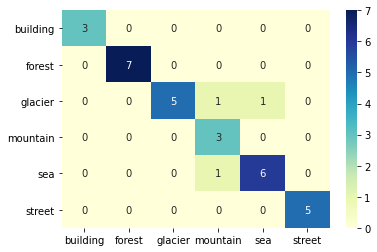

In [30]:
import seaborn as sns
class_names=["building","forest","glacier","mountain","sea","street"]
sns.heatmap(confusion_mtx, xticklabels=class_names, yticklabels=class_names, annot=True, fmt='d', cmap="YlGnBu")

In [32]:
# loading prediction data

path_pred = "/content/seg_pred"
predict_datagen = ImageDataGenerator(rescale=1. / 255)
predict = predict_datagen.flow_from_directory(path_pred, target_size=(227,227), batch_size = 5,class_mode='categorical')


Found 7301 images belonging to 1 classes.


In [33]:

predictions = alex.predict(predict)

In [34]:

def get_category(predicted_output):
    path1 ="/content/seg_train/seg_train"
    return os.listdir(path1)[np.argmax(predicted_output)]


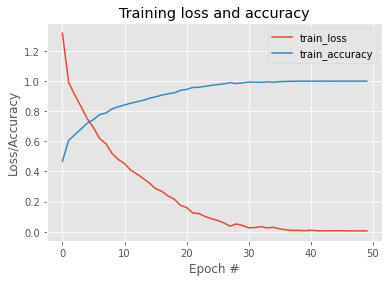

In [41]:
import matplotlib.pyplot as plt
N = np.arange(0, 50)
plt.style.use('ggplot')
plt.figure()
plt.plot(N, hist.history['loss'], label='train_loss')
plt.plot(N, hist.history['accuracy'], label='train_accuracy')
plt.title('Training loss and accuracy')
plt.xlabel('Epoch #')
plt.ylabel('Loss/Accuracy')
plt.legend()
plt.show()

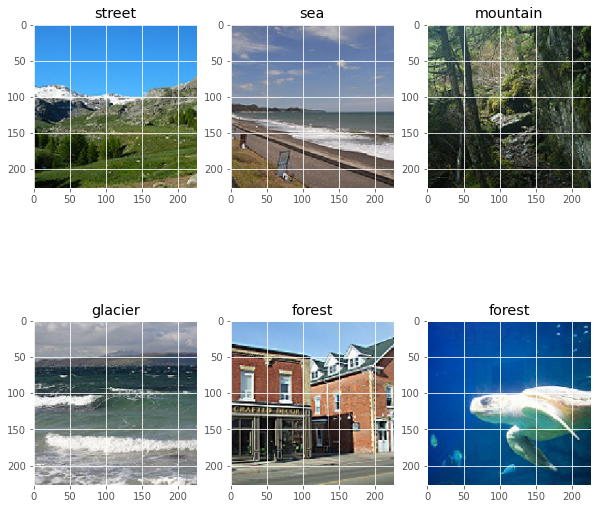

In [42]:

fig , axs = plt.subplots(2,3 ,figsize = (10,10))

axs[0][0].imshow(predict[1][0][0])
axs[0][0].set_title(get_category(predictions[1]))
axs[0][1].imshow(predict[2][0][0])
axs[0][1].set_title(get_category(predictions[2]))
axs[0][2].imshow(predict[3][0][0])
axs[0][2].set_title(get_category(predictions[3]))
axs[1][0].imshow(predict[4][0][0])
axs[1][0].set_title(get_category(predictions[4]))
axs[1][1].imshow(predict[5][0][0])
axs[1][1].set_title(get_category(predictions[5]))
axs[1][2].imshow(predict[6][0][0])
axs[1][2].set_title(get_category(predictions[6]))


plt.show()
